<a href="https://colab.research.google.com/github/jvataidee/ManualdeAnalisedeDados_Python/blob/master/cap3_estatistica_descritiva_bivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# **CAP 02: Estatística Descritiva Bivariada**

---



In [2]:
#importar bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
from scipy.stats import chi2_contingency, spearmanr

## Associações entre duas variáveis qualitativas


### Tabelas de distribuição conjunta de frequência

In [90]:
dados = pd.read_stata("/content/PlanoSaude.dta")
dados.head()

,operadora,satisfacao
0,total health,baixo
1,total health,baixo
2,total health,baixo
3,total health,baixo
4,total health,baixo


### Medidas de associação
As principais medidas representativas são:

* `Qui-Quadrado` $X^2$ utilizada para dados qualitativos.
* `Coeficiente Phi` é o coeficiente V de contigência dados nominais
* `Spearman` para dados ordinais

In [65]:
#tabelas de contingência
contigency = pd.crosstab(dados['operadora'], dados['satisfacao'])
contigency.columns = contigency.columns.tolist()
contigency = contigency.reset_index()

#calculando totais
contigency["total"] = contigency["baixo"] + contigency["médio"] + contigency["alto"]

contigency = contigency.append({'operadora':'Total',
                         'baixo':sum(contigency["baixo"]),
                         'médio':sum(contigency["médio"]),
                         'alto':sum(contigency["alto"]),
                         'total':sum(contigency["total"])}, ignore_index=True)


contigency

,operadora,baixo,médio,alto,total
0,total health,40,16,12,68
1,viva vida,32,24,16,72
2,mena saúde,24,32,4,60
3,Total,96,72,32,200


In [95]:
# Qui-Quadrado teste.
contigency2 = pd.crosstab(dados['operadora'], dados['satisfacao']) 
c, p, dof, expected = chi2_contingency(contigency2)
np.round(c)

16.0

#### Qui-Quadrado
Mede a discrepãncia entre uma tabela de contigência observada e um tabela de contigência esperada.

$X^2 = \sum_{i=1}^I\sum_{j=1}^J\frac{(O_{ij} - E_{ij})^2}{E_{ij}}$

In [76]:
#tabelas de contingência
contigency = pd.crosstab(dados['operadora'], dados['satisfacao'],normalize='index')
contigency.columns = contigency.columns.tolist()
contigency = contigency.reset_index()

#calculando totais
contigency["total"] = contigency["baixo"] + contigency["médio"] + contigency["alto"]

contigency["total"] = np.round(contigency["total"] * 100, 2)
contigency["baixo"] = np.round(contigency["baixo"] * 100, 2)
contigency["médio"] = np.round(contigency["médio"] * 100, 2)
contigency["alto"] = np.round(contigency["alto"] * 100, 2)

contigency = contigency.append({'operadora':'Total',
                         'baixo':np.round(np.mean(contigency["baixo"]),2),
                         'médio':np.round(np.mean(contigency["médio"]),2),
                         'alto':np.round(np.mean(contigency["alto"]),2),
                         'total':np.round(np.mean(contigency["total"]),2)}, ignore_index=True)


contigency

,operadora,baixo,médio,alto,total
0,total health,58.82,23.53,17.65,100.0
1,viva vida,44.44,33.33,22.22,100.0
2,mena saúde,40.00,53.33,6.67,100.0
3,Total,47.75,36.73,15.51,100.0


#### Coeficiente Phi
Medida de associação mais simples para variáveis nominais

$Phi = \sqrt{\frac{x^2}{n}}$

Para Phi varia de 0 - 1 necessita que a tabela de contigência seja 2 x 2

In [103]:
dados = pd.read_stata("/content/Segmentação_Mercado.dta")
dados.head()

,roupa,região
0,gravata,sul
1,camisa polo,norte
2,camisa social,sul
3,calça,norte
4,gravata,sul


In [118]:
# Phi teste.
contigency2 = pd.crosstab(dados['roupa'], dados['região']) 
c, p, dof, expected = chi2_contingency(contigency2)
phi = np.round(np.sqrt(c/ len(dados["roupa"])), 2)
phi

0.95

#### Coeficiente de contigência de person
também é uma medida de assosicação das variáveis nominais

$ C = \sqrt{\frac{X^2}{n + X^2}}$

In [123]:
# COntigencia de Person teste.
contigency2 = pd.crosstab(dados['roupa'], dados['região']) 
c, p, dof, expected = chi2_contingency(contigency2)
C = np.round(np.sqrt(c/ (len(dados["roupa"]) +c)), 2)
C

0.69

#### Coeficiente de contigência V Carmer

$V = \sqrt{\frac{X^2}{n(q-1)}}$

$V = Phi$ quando tabela de contingencia é 2x2

In [135]:
# COntigencia de Person teste.
contigency2 = pd.crosstab(dados['roupa'], dados['região']) 
c, p, dof, expected = chi2_contingency(contigency2)



if contigency2.shape[0] > contigency2.shape[1]:
    V = np.round(np.sqrt(c/ (len(dados["roupa"])*(contigency2.shape[0] - 1))), 2)
else:
    V = np.round(np.sqrt(c/ (len(dados["roupa"])*(contigency2.shape[1] - 1))), 2)
V

0.55

#### Coeficiente de Spearman

$r_{sp} = \frac{6\sum_{k=1}^n{d_{k}^2}}{n(n^2 - 1)}$

$r_{sp} >= -1$ Assossiação linear negativa <p>
$r_{sp} = 0$ Não há associação <p>
$r_{sp} <= 1$ Assossiação positiva negativa <p>

In [138]:
dados = pd.read_stata("/content/Notas.dta")
dados.head()

,simulação,finanças
0,5,6
1,7,5
2,8,8
3,6,9
4,4,2


In [143]:
np.round(stats.spearmanr(dados)[0], 2)

0.76

## Associações entre duas variáveis quantitativas

### Representação gráfica por meio de diagrama de dispersão

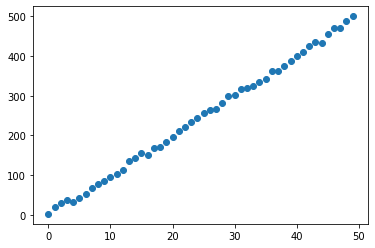

In [4]:
dado_1 = pd.DataFrame()
dado_1["X"] = np.arange(50)
delta = np.random.uniform(-10, 10, dado_1["X"].size)
dado_1["Y"]= 10*dado_1["X"]  + delta

plt.scatter(y = dado_1["Y"], x = dado_1["X"]);

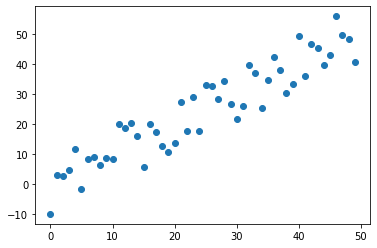

In [6]:
dado_2 = pd.DataFrame()
dado_2["X"] = np.arange(50)
delta = np.random.uniform(-10, 10, dado_2["X"].size)
dado_2["Y"]= dado_2["X"]+ delta

plt.scatter(y = dado_2["Y"], x = dado_2["X"]);

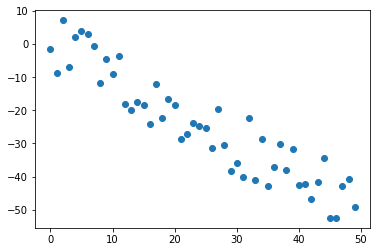

In [7]:
dado_3 = pd.DataFrame()
dado_3["X"] = np.arange(50)
delta = np.random.uniform(-10, 10, dado_3["X"].size)
dado_3["Y"]= -dado_3["X"]  + delta

plt.scatter(y = dado_3["Y"], x = dado_3["X"]);

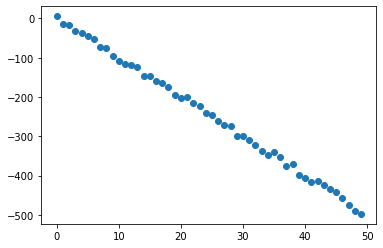

In [10]:
dado_4 = pd.DataFrame()
dado_4["X"] = np.arange(50)
delta = np.random.uniform(-10, 10, dado_4["X"].size)
dado_4["Y"]= -10*dado_4["X"] + delta

plt.scatter(y = dado_4["Y"], x = dado_4["X"]);

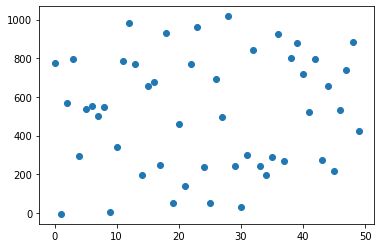

In [11]:
dado_5 = pd.DataFrame()
dado_5["X"] = np.arange(50)
delta = np.random.uniform(-10, 1000, dado_5["X"].size)
dado_5["Y"]=  dado_5["X"] + delta

plt.scatter(y = dado_5["Y"], x = dado_5["X"]);

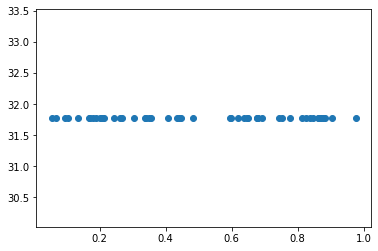

In [41]:
dado_6 = pd.DataFrame()
dado_6["X"] = np.random.rand(50)
delta = np.random.uniform(1, dado_6["X"].size)
dado_6["Y"] =  delta

plt.scatter(y = dado_6["Y"], x = dado_6["X"]);

### Covariância
Mede a variação conjunta de duas variáveis quantitativas

$cov = \frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{n -1}$

In [72]:
dado_1.cov()

,X,Y
X,212.500000,2140.050906
Y,2140.050906,21586.726812


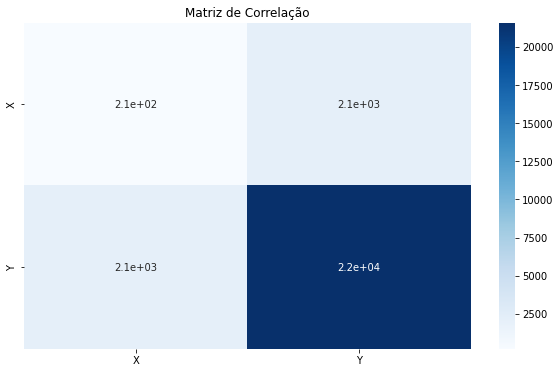

In [71]:
#Plotar matriz de correlação
plt.figure(figsize = (10,6))
plt.title("Matriz de Correlação")

sns.heatmap(dado_1.cov(), cmap = 'Blues' ,annot=True)
plt.show()

### Correlação de Pearson

$cor = \frac{cov(X, y)}{S_xS_y}$


$cor >= -1$ correlação negativa e forte<p>
$cor = 0$  não existe correlação <p>
$cor <= 1$ Correlação positiva e forte <p>

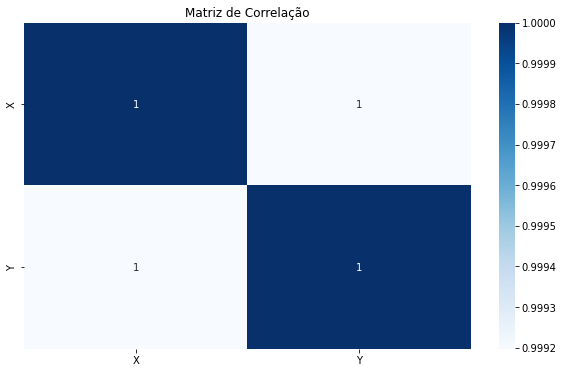

In [73]:
#Plotar matriz de correlação
plt.figure(figsize = (10,6))
plt.title("Matriz de Correlação")

sns.heatmap(dado_1.corr(), cmap = 'Blues' ,annot=True)
plt.show()